### Importing Dataset and Libraries

In [34]:
from google.colab import files
import pandas as pd

# Raw GitHub CSV URL
url = 'https://raw.githubusercontent.com/Jessiewilliam/Azubi-Data-Analytics-Project/main/bank-additional-full.csv'

# Load the CSV using the correct separator and quote character
df = pd.read_csv(url, sep=';', quotechar='"')

# Show the first few rows
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


### Dataset Description

In [35]:
print(df.shape)

print(df.columns)

print(df.info())

(41188, 21)
Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  

### Refining Column Names

In [36]:
def clean_column(col):
    return col.strip().replace('_', ' ').lower().capitalize()

df.columns = [clean_column(col) for col in df.columns]

df.columns

Index(['Age', 'Job', 'Marital', 'Education', 'Default', 'Housing', 'Loan',
       'Contact', 'Month', 'Day of week', 'Duration', 'Campaign', 'Pdays',
       'Previous', 'Poutcome', 'Emp.var.rate', 'Cons.price.idx',
       'Cons.conf.idx', 'Euribor3m', 'Nr.employed', 'Y'],
      dtype='object')

### Resolving Data Duplicates and Null Values

In [37]:
# Handling Duplicates
num_duplicates = df.duplicated().sum()
print(f"Number of repeated rows: {num_duplicates}")

# Remove repeated rows
df = df.drop_duplicates()

# Handling Null Values
# Display count of missing values in each column
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

# Drop rows with any missing values
df_cleaned = df.dropna()


Number of repeated rows: 12
Missing values per column:
Age               0
Job               0
Marital           0
Education         0
Default           0
Housing           0
Loan              0
Contact           0
Month             0
Day of week       0
Duration          0
Campaign          0
Pdays             0
Previous          0
Poutcome          0
Emp.var.rate      0
Cons.price.idx    0
Cons.conf.idx     0
Euribor3m         0
Nr.employed       0
Y                 0
dtype: int64


### Changing field types into the Right Data Types

In [38]:
# Convert Numeric Fields to Correct Data Type
numeric_columns = [
    'Age', 'Duration', 'Campaign', 'Pdays', 'Previous',
    'Emp.var.rate', 'Cons.price.idx', 'Cons.conf.idx',
    'Euribor3m', 'Nr.employed'
]

# Convert specified columns to numeric, casting errors
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')


# Convert Categorical Fields to Correct Data Type
categorical_columns = [
    'Job', 'Marital', 'Education', 'Default', 'Housing', 'Loan',
    'Contact', 'Month', 'Day.of.week', 'Poutcome', 'Y'
]


# df[categorical_columns] = df[categorical_columns].astype('category')

# Print Datatypes
print(df.dtypes)


# Convert Duration to HH:MM:SS Format
df['Duration'] = pd.to_timedelta(df['Duration'], unit='s')


# Preview the cleaned DataFrame
df.head()


Age                 int64
Job                object
Marital            object
Education          object
Default            object
Housing            object
Loan               object
Contact            object
Month              object
Day of week        object
Duration            int64
Campaign            int64
Pdays               int64
Previous            int64
Poutcome           object
Emp.var.rate      float64
Cons.price.idx    float64
Cons.conf.idx     float64
Euribor3m         float64
Nr.employed       float64
Y                  object
dtype: object


,Age,Job,Marital,Education,Default,Housing,Loan,Contact,Month,Day of week,...,Campaign,Pdays,Previous,Poutcome,Emp.var.rate,Cons.price.idx,Cons.conf.idx,Euribor3m,Nr.employed,Y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Descriptive Statistics

In [39]:
# Displaying Descriptive Statistics
summary_stats = df.describe(include='all')
print(summary_stats)

                Age     Job  Marital          Education Default Housing  \
count   41176.00000   41176    41176              41176   41176   41176   
unique          NaN      12        4                  8       3       3   
top             NaN  admin.  married  university.degree      no     yes   
freq            NaN   10419    24921              12164   32577   21571   
mean       40.02380     NaN      NaN                NaN     NaN     NaN   
std        10.42068     NaN      NaN                NaN     NaN     NaN   
min        17.00000     NaN      NaN                NaN     NaN     NaN   
25%        32.00000     NaN      NaN                NaN     NaN     NaN   
50%        38.00000     NaN      NaN                NaN     NaN     NaN   
75%        47.00000     NaN      NaN                NaN     NaN     NaN   
max        98.00000     NaN      NaN                NaN     NaN     NaN   

         Loan   Contact  Month Day of week  ...      Campaign         Pdays  \
count   41176     41

### Category Distribution


Proportion of classes in 'Y':
Y
no     0.887337
yes    0.112663
Name: proportion, dtype: float64

Proportion of classes in 'Marital':
Marital
married     0.605231
single      0.280843
divorced    0.111983
unknown     0.001943
Name: proportion, dtype: float64

Proportion of classes in 'Default':
Default
no         0.791165
unknown    0.208762
yes        0.000073
Name: proportion, dtype: float64

Proportion of classes in 'Housing':
Housing
yes        0.523873
no         0.452084
unknown    0.024043
Name: proportion, dtype: float64

Proportion of classes in 'Loan':
Loan
no         0.824218
yes        0.151739
unknown    0.024043
Name: proportion, dtype: float64

Proportion of classes in 'Poutcome':
Poutcome
nonexistent    0.863391
failure        0.103264
success        0.033345
Name: proportion, dtype: float64

Proportion of classes in 'Education':
Education
university.degree      0.295415
high.school            0.231008
basic.9y               0.146809
professional.course    0.127259
bas

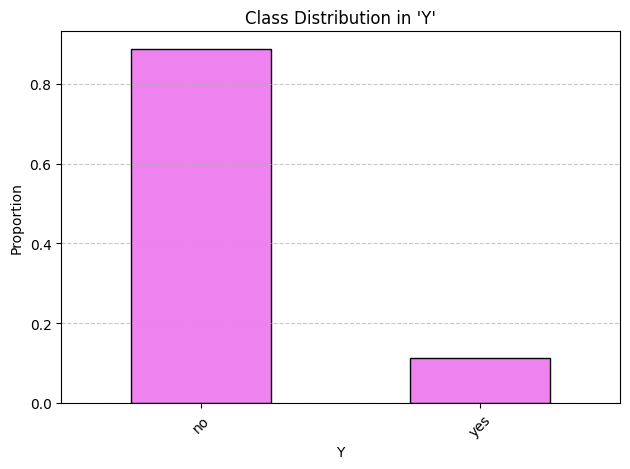

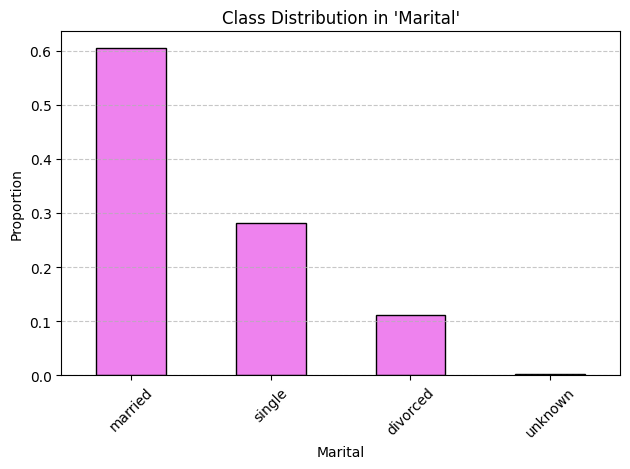

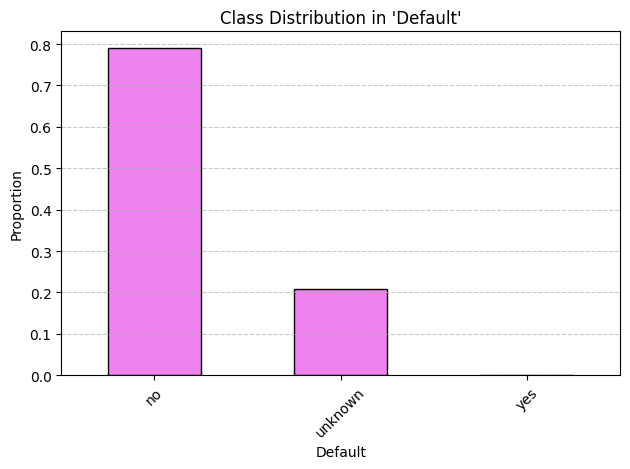

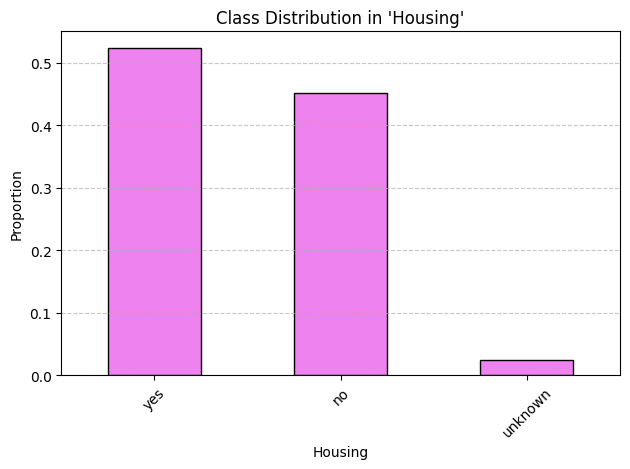

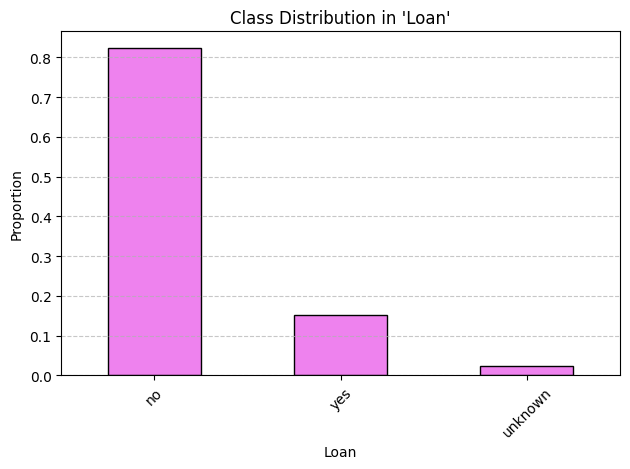

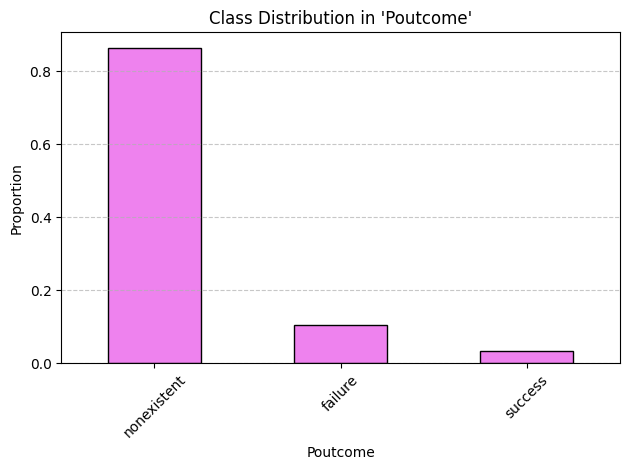

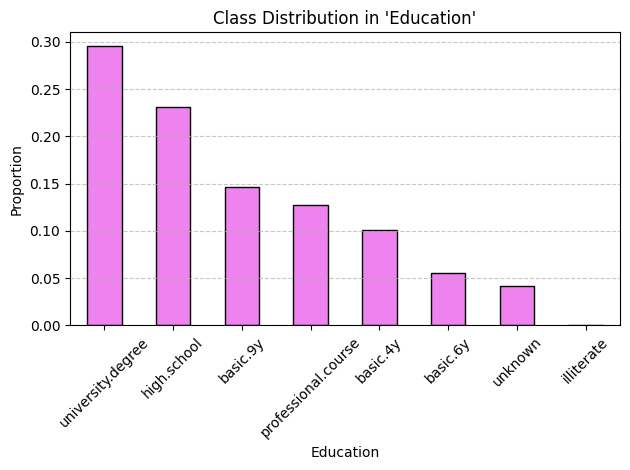

In [40]:
import matplotlib.pyplot as plt

# Analyzing Class Imbalance Across Selected Columns
columns_to_analyze = ['Y', 'Marital', 'Default', 'Housing', 'Loan', 'Poutcome', 'Education']

# Display class proportions for each column
for col in columns_to_analyze:
    print(f"\nProportion of classes in '{col}':")
    print(df[col].value_counts(normalize=True))

# Plot the distribution for each column
for col in columns_to_analyze:
    df[col].value_counts(normalize=True).plot(kind='bar', color='violet', edgecolor='black')
    plt.title(f"Class Distribution in '{col}'")
    plt.ylabel("Proportion")
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


### Conducting Exploratory Data Analysis

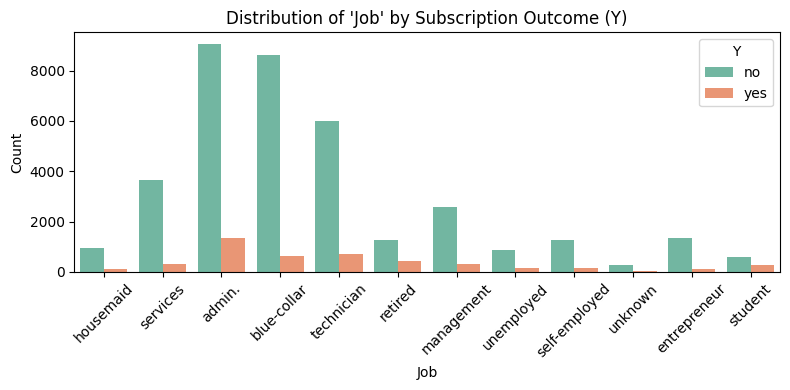

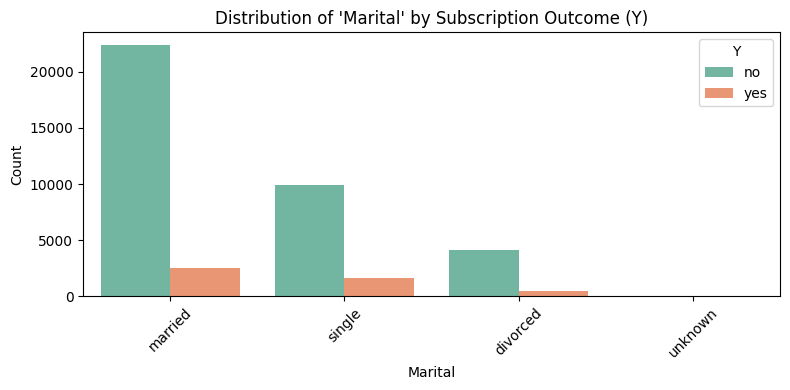

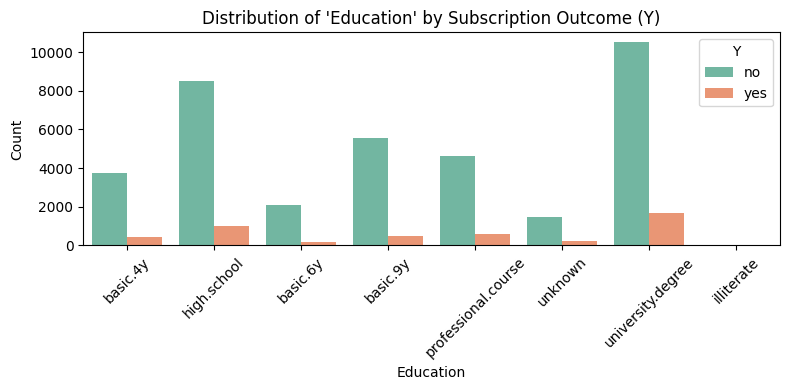

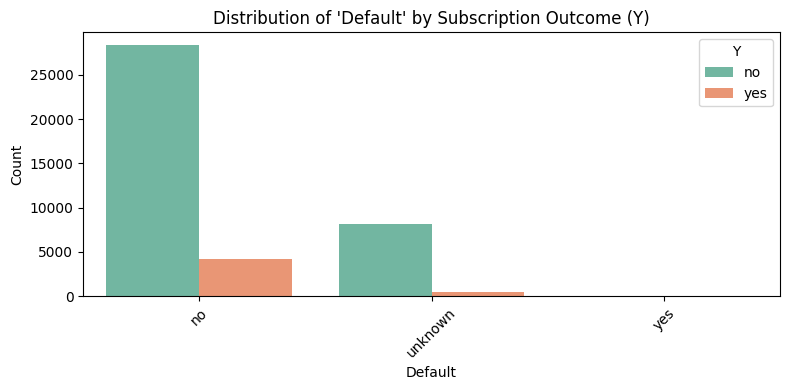

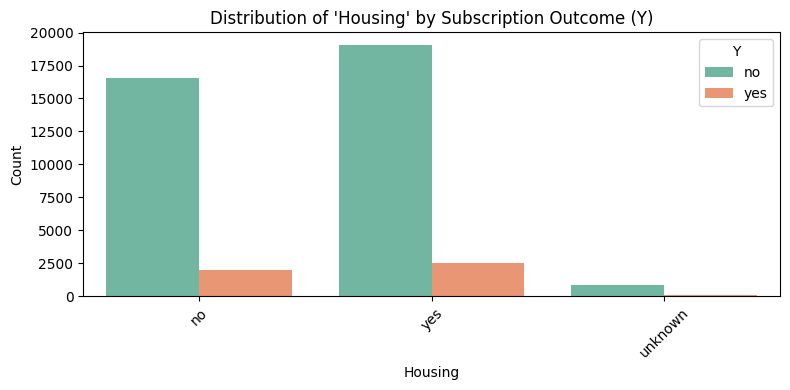

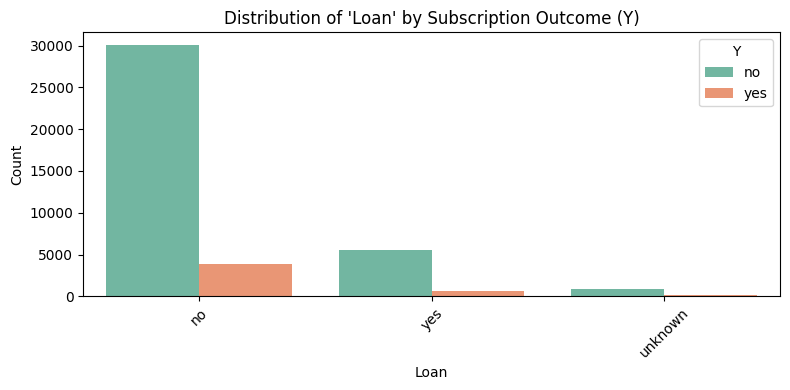

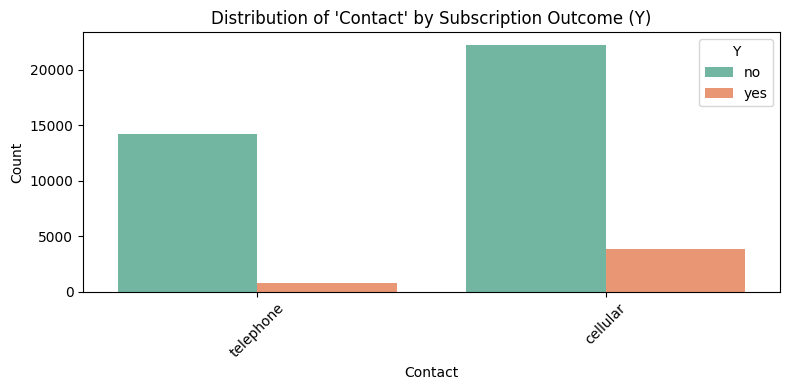

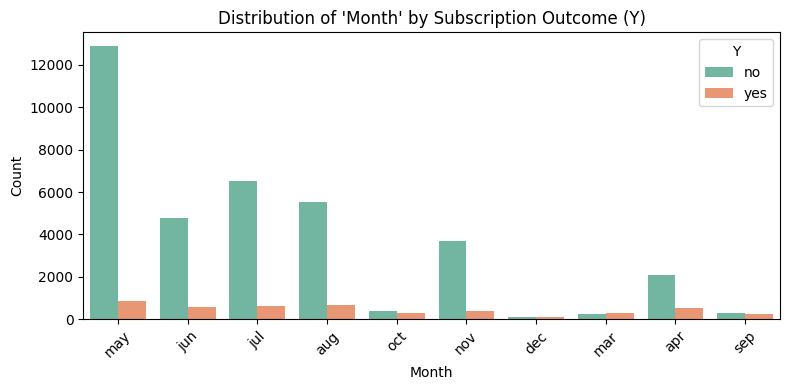

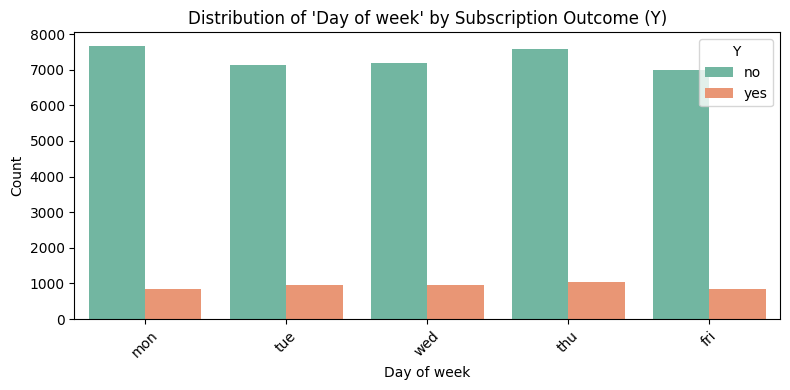

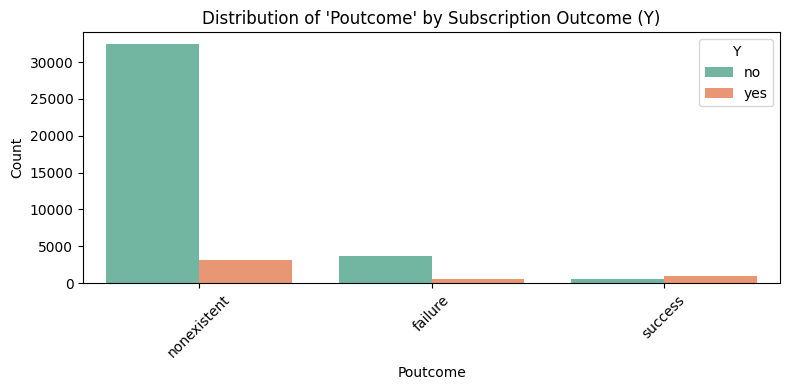

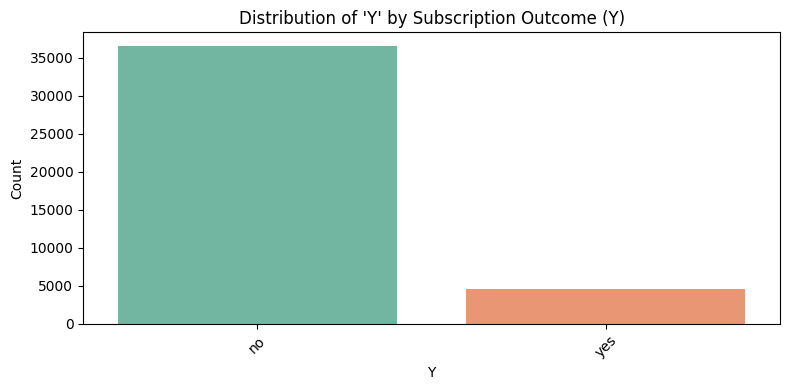

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Exploring Relationship Between Categorical Features and Subscription Decision

# Identify all categorical columns
categorical_features = df.select_dtypes(include='object').columns

# Plot count distribution for each categorical feature with respect to 'Y'
for col in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, hue='Y', palette='Set2')
    plt.title(f"Distribution of '{col}' by Subscription Outcome (Y)")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


### Exploring Numerical Data

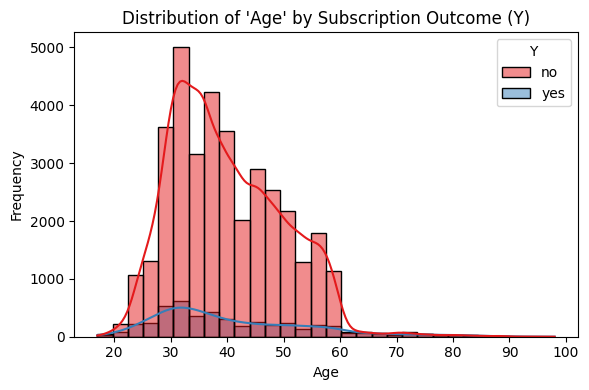

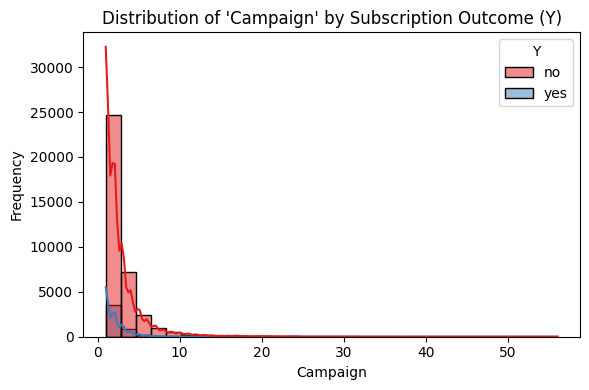

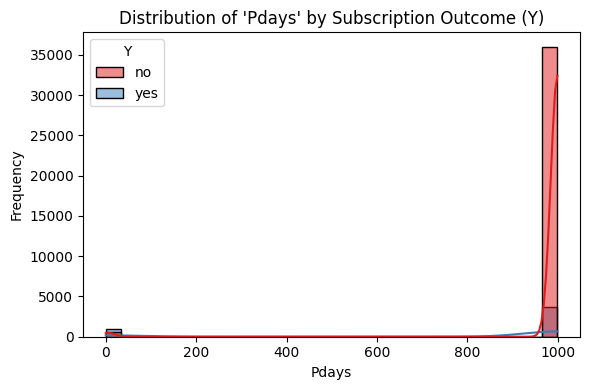

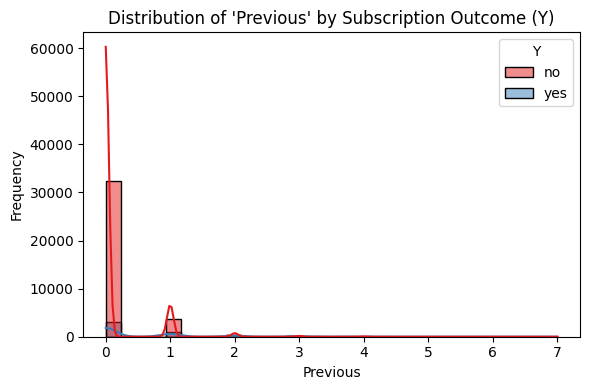

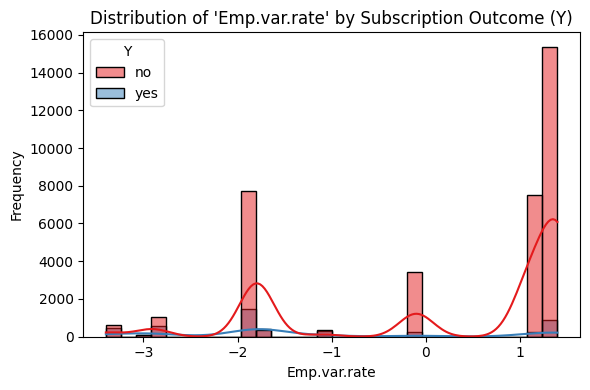

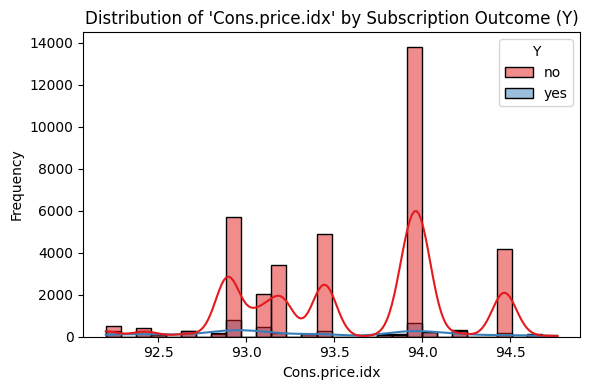

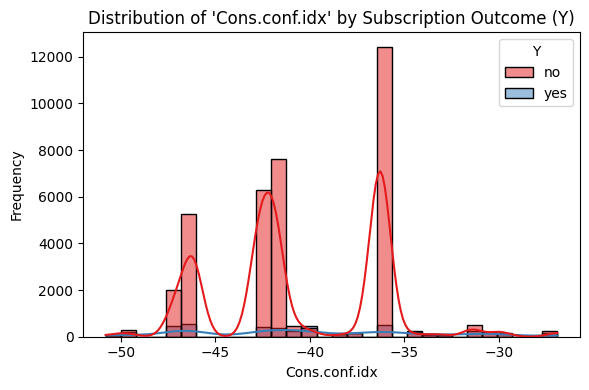

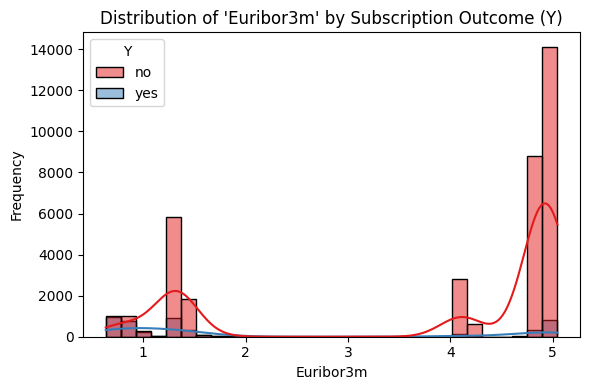

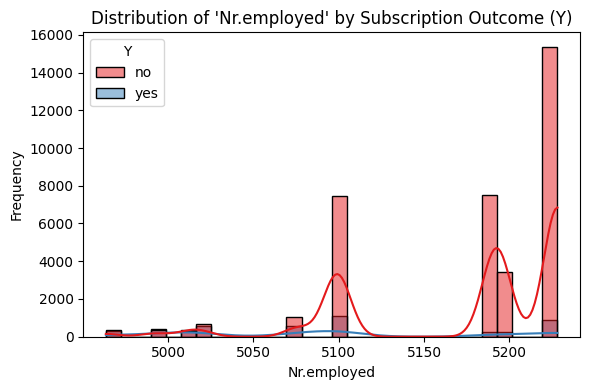

In [42]:
# Select all numeric columns
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

# Plot distribution of each numerical feature, colored by 'Y'
for col in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=col, hue='Y', kde=True, bins=30, palette='Set1')
    plt.title(f"Distribution of '{col}' by Subscription Outcome (Y)")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

### Finding Anomalies

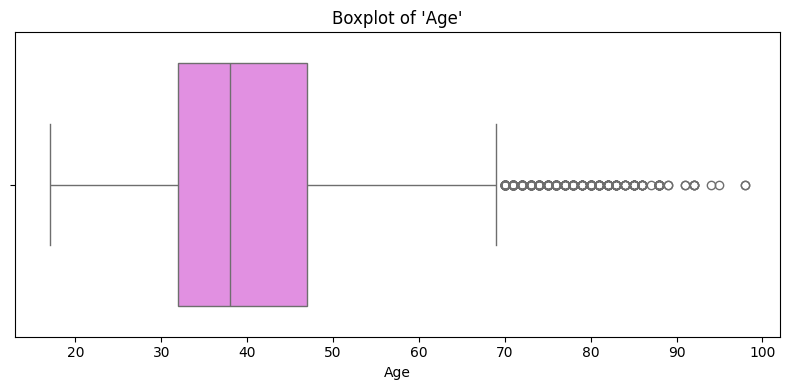

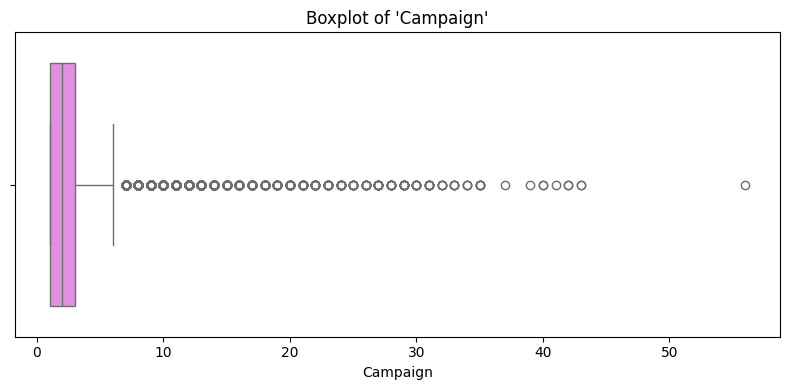

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Outlier Detection Using Boxplots

# Select numerical columns to analyze for outliers
numeric_columns_to_check = ['Age', 'Campaign']

# Create a boxplot for each selected numeric feature
for col in numeric_columns_to_check:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col], color='violet')
    plt.title(f"Boxplot of '{col}'")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()


### Box chart

<ipython-input-44-4043039925>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Y', y='Age', palette='Set2')


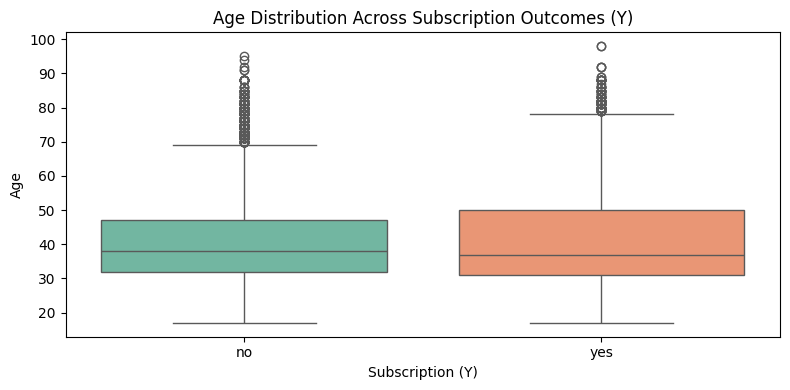

In [44]:


# Age Distribution by Subscription Outcome
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='Y', y='Age', palette='Set2')
plt.title("Age Distribution Across Subscription Outcomes (Y)")
plt.xlabel("Subscription (Y)")
plt.ylabel("Age")
plt.tight_layout()
plt.show()



### Correlation Analysis

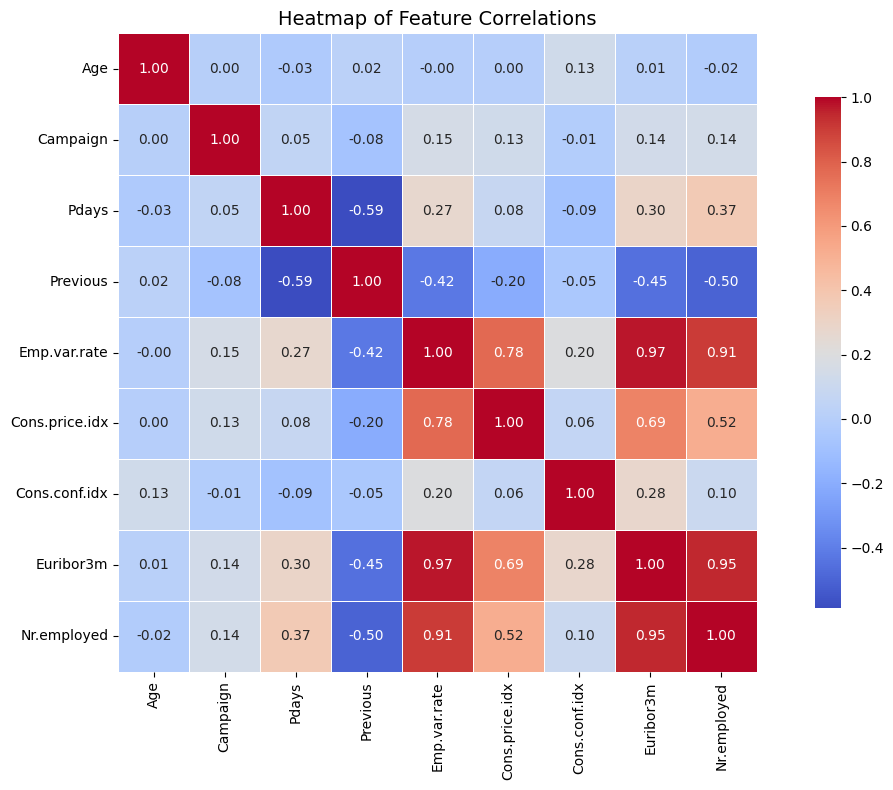

In [45]:
# Correlation Heatmap of Numerical Features
plt.figure(figsize=(12, 8))

# Compute the correlation matrix for numeric columns
correlation_matrix = df.select_dtypes(include=['int64', 'float64']).corr()

# Create heatmap
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    linewidths=0.5,
    square=True,
    cbar_kws={"shrink": 0.8}
)

plt.title("Heatmap of Feature Correlations", fontsize=14)
plt.tight_layout()
plt.show()

## Feature Engineering Steps

### Resolving Problem Columns and Encoding Non-Numeric Attributes

In [46]:
#Removing Problematic Columns
df.drop(columns=["Duration"], inplace=True)

# Encoding Nominal Categorical Variables
nominal_features = ["Job", "Marital", "Contact", "Poutcome"]
df = pd.get_dummies(df, columns=nominal_features, drop_first=True)

# Encoding Ordinal Categorical Variables
education_mapping = {
    'unknown': 0,
    'basic.4y': 1,
    'basic.6y': 2,
    'basic.9y': 3,
    'high.school': 4,
    'illiterate': 5,
    'professional.course': 6,
    'university.degree': 7
}
df['Education'] = df['Education'].map(education_mapping)

# Display updated column names
print("Updated DataFrame columns:", df.columns.tolist())


Updated DataFrame columns: ['Age', 'Education', 'Default', 'Housing', 'Loan', 'Month', 'Day of week', 'Campaign', 'Pdays', 'Previous', 'Emp.var.rate', 'Cons.price.idx', 'Cons.conf.idx', 'Euribor3m', 'Nr.employed', 'Y', 'Job_blue-collar', 'Job_entrepreneur', 'Job_housemaid', 'Job_management', 'Job_retired', 'Job_self-employed', 'Job_services', 'Job_student', 'Job_technician', 'Job_unemployed', 'Job_unknown', 'Marital_married', 'Marital_single', 'Marital_unknown', 'Contact_telephone', 'Poutcome_nonexistent', 'Poutcome_success']


### Transform Columns to Binary Format

In [47]:
# Previewing the first 10 rows of selected binary columns
selected_columns = ["Housing", "Loan", "Default", "Y"]
print(df[selected_columns].head(10))


  Housing Loan  Default   Y
0      no   no       no  no
1      no   no  unknown  no
2     yes   no       no  no
3      no   no       no  no
4      no  yes       no  no
5      no   no  unknown  no
6      no   no       no  no
7      no   no  unknown  no
8     yes   no       no  no
9     yes   no       no  no


In [48]:
# Standardizing Text in Binary Columns
binary_columns = ["Housing", "Loan", "Default", "Y"]

for col in binary_columns:
    df[col] = df[col].astype(str).str.lower().str.strip()


### Enhanced Attributes

In [49]:
# Creating a Feature for Initial Contact Attempt
df["Initial_Contact"] = df["Pdays"].apply(lambda x: 0 if x == -1 else 1)

# Mapping Month Names to Numeric Values
month_mapping = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4,
    'may': 5, 'jun': 6, 'jul': 7, 'aug': 8,
    'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}
df["Month_Num"] = df["Month"].map(month_mapping)

# Creating a Feature for Total Contact Attempts
df["Combined_Contacts"] = df["Campaign"] + df["Previous"]


In [50]:
engineered_columns = [
    "Pdays", "Initial_Contact", "Month", "Month_Num",
    "Campaign", "Previous", "Combined_Contacts"
]

df[engineered_columns].head()

,Pdays,Initial_Contact,Month,Month_Num,Campaign,Previous,Combined_Contacts
0,999,1,may,5,1,0,1
1,999,1,may,5,1,0,1
2,999,1,may,5,1,0,1
3,999,1,may,5,1,0,1
4,999,1,may,5,1,0,1


### Standardizing Data

In [51]:
from sklearn.preprocessing import StandardScaler

# Selecting Continuous Numerical Columns for Scaling
continuous_features = [
    'Age', 'Campaign', 'Pdays', 'Previous',
    'Emp.var.rate', 'Cons.price.idx', 'Cons.conf.idx',
    'Euribor3m', 'Nr.employed', 'Month_Num', 'Combined_Contacts'
]

# Applying Standard Scaling
scaler = StandardScaler()
df[continuous_features] = scaler.fit_transform(df[continuous_features])

# Verifying Columns
print(df.columns.tolist())


['Age', 'Education', 'Default', 'Housing', 'Loan', 'Month', 'Day of week', 'Campaign', 'Pdays', 'Previous', 'Emp.var.rate', 'Cons.price.idx', 'Cons.conf.idx', 'Euribor3m', 'Nr.employed', 'Y', 'Job_blue-collar', 'Job_entrepreneur', 'Job_housemaid', 'Job_management', 'Job_retired', 'Job_self-employed', 'Job_services', 'Job_student', 'Job_technician', 'Job_unemployed', 'Job_unknown', 'Marital_married', 'Marital_single', 'Marital_unknown', 'Contact_telephone', 'Poutcome_nonexistent', 'Poutcome_success', 'Initial_Contact', 'Month_Num', 'Combined_Contacts']


### Eliminating Irrelevant Columns

In [52]:
X = df.drop("Y", axis=1)  # Feature set
y = df["Y"]

### Correlating with the Target Variable

<ipython-input-53-1730117933>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Y', y=feature, palette='Set2')


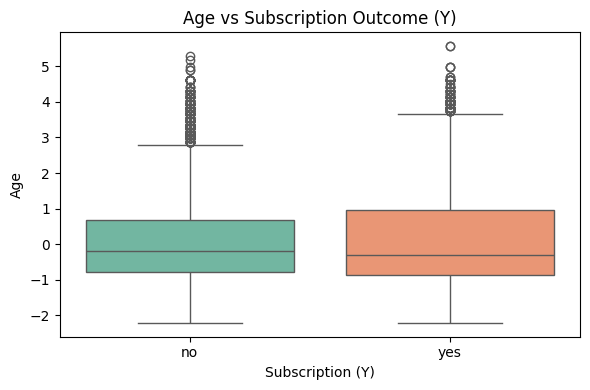

<ipython-input-53-1730117933>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Y', y=feature, palette='Set2')


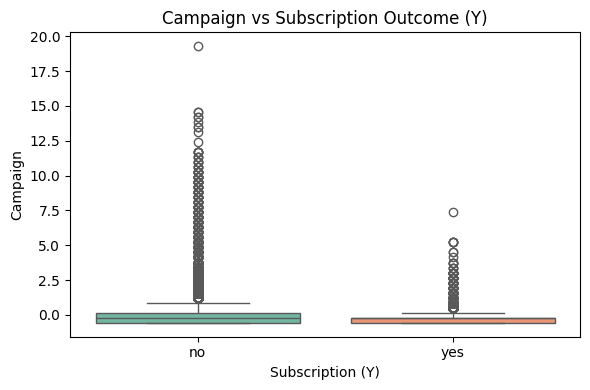

In [53]:
# Visualizing Distribution of Numerical Features by Subscription Outcome
selected_features = ['Age', 'Campaign']

for feature in selected_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x='Y', y=feature, palette='Set2')
    plt.title(f'{feature} vs Subscription Outcome (Y)')
    plt.xlabel('Subscription (Y)')
    plt.ylabel(feature)
    plt.tight_layout()
    plt.show()

### Addressing Target Class Imbalance

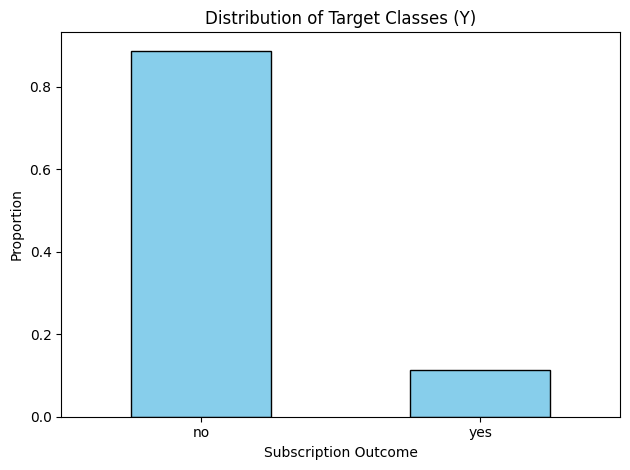

In [54]:
# Check for imbalance in the target variable
target_distribution = df['Y'].value_counts(normalize=True)

# Plot the class proportions
target_distribution.plot(
    kind='bar',
    title='Distribution of Target Classes (Y)',
    color='skyblue',
    edgecolor='black'
)

plt.xlabel('Subscription Outcome')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Addressing Imbalance Using Oversampling

In [55]:
from sklearn.linear_model import LogisticRegression

# Initialize logistic regression with automatic class balancing
log_reg_model = LogisticRegression(class_weight='balanced', random_state=42)

# Optional: Fit the model when training data is available
# log_reg_model.fit(X_train, y_train)


## Developing Predictive Models

### Establishing a Baseline with Logistic Regression

In [56]:
# Data splitting
from sklearn.model_selection import train_test_split

# Logistic Regression model
from sklearn.linear_model import LogisticRegression

# Evaluation metrics
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    ConfusionMatrixDisplay
)

# Visualization tools
import matplotlib.pyplot as plt
import seaborn as sns


### Removing Target Variable

In [57]:
# Define feature matrix (X) by removing the target column
X = df.drop(columns=['Y'])

# Define target vector (y)
y = df['Y']


### Creating Train-Test Split

In [58]:
from sklearn.model_selection import train_test_split

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Show class balance
print("Training set class distribution:")
print(y_train.value_counts(normalize=True))

print("\nTesting set class distribution:")
print(y_test.value_counts(normalize=True))


Training set class distribution:
Y
no     0.887341
yes    0.112659
Name: proportion, dtype: float64

Testing set class distribution:
Y
no     0.887324
yes    0.112676
Name: proportion, dtype: float64


## Maintaining Target Class Balance

### Developing the Logistic Regression Model

In [59]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

# Select only numeric columns for imputation
X_train_numeric = X_train.select_dtypes(include=['float64', 'int64'])

# Apply imputer to numeric features
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_numeric)

# If needed, you can convert the imputed array back to a DataFrame
import pandas as pd
X_train_imputed = pd.DataFrame(X_train_imputed, columns=X_train_numeric.columns)

# Fit logistic regression on imputed data
model = LogisticRegression()
model.fit(X_train_imputed, y_train)


LogisticRegression()

### Model Evaluation

 Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.77      0.85      7308
           1       0.28      0.70      0.40       928

    accuracy                           0.77      8236
   macro avg       0.62      0.74      0.63      8236
weighted avg       0.88      0.77      0.80      8236



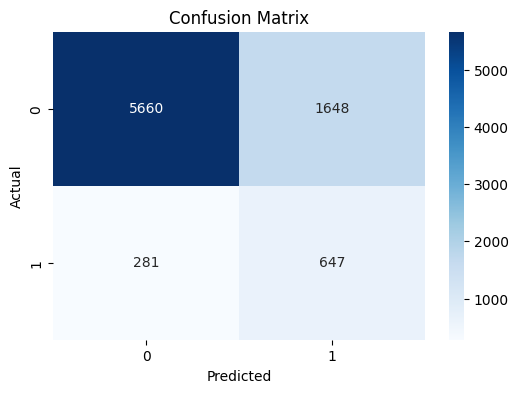

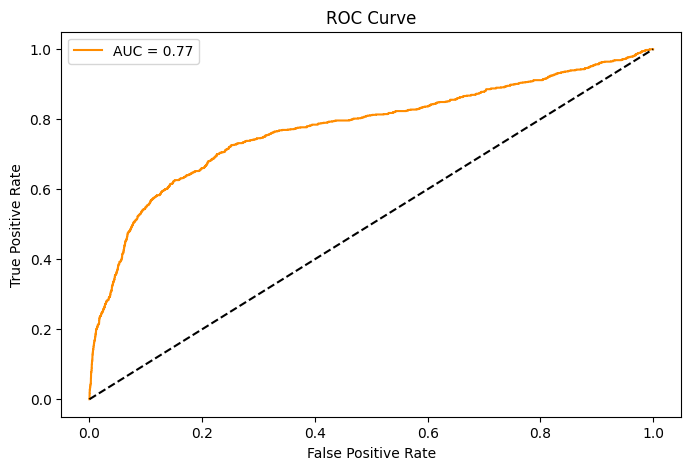

In [60]:
# Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Step 1: Encode Target Variable
df['Y'] = df['Y'].map({'no': 0, 'yes': 1})  # Convert 'no' to 0, 'yes' to 1

# Step 2: Split Dataset into Features and Target
X = df.drop(columns=['Y'])   # Feature set
y = df['Y']                  # Numeric Target

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 4: Select Only Numeric Columns
numeric_columns = X_train.select_dtypes(include='number').columns

# Step 5: Impute Missing Values (Mean Strategy)
imputer = SimpleImputer(strategy='mean')

X_train_numeric = X_train[numeric_columns]
X_test_numeric = X_test[numeric_columns]

X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train_numeric), columns=numeric_columns)
X_test_imputed = pd.DataFrame(imputer.transform(X_test_numeric), columns=numeric_columns)

# Step 6: Train Logistic Regression Model
logreg = LogisticRegression(class_weight='balanced', max_iter=1000)
logreg.fit(X_train_imputed, y_train)

# Step 7: Predict Outcomes
y_pred = logreg.predict(X_test_imputed)
y_proba = logreg.predict_proba(X_test_imputed)[:, 1]

# Step 8: Classification Report
print(" Classification Report:")
print(classification_report(y_test, y_pred))

# Step 9: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Step 10: ROC Curve and AUC Score
roc_auc = roc_auc_score(y_test, y_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color='darkorange')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal reference line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


### Building the Random Forest Model

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

# Step 1: Select Numeric Features from Training Data
X_train_numeric = X_train.select_dtypes(include='number')

# Step 2: Handle Missing Values with Mean Imputation
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_numeric)

# Step 3: Initialize and Train Random Forest Classifier
rf_model = RandomForestClassifier(
    n_estimators=100,          # Number of trees
    max_depth=None,            # Let trees expand fully
    random_state=42,           # For reproducibility
    class_weight='balanced'    # Handle class imbalance
)
rf_model.fit(X_train_imputed, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

### Predicting Outcomes

In [62]:
#  Step 1: Prepare Test Data (Same Preprocessing as Training)
X_test_numeric = X_test.select_dtypes(include='number')   # Select numeric columns only
X_test_imputed = imputer.transform(X_test_numeric)        # Apply the fitted imputer

#  Step 2: Generate Predictions with Trained Random Forest Model
y_pred = rf_model.predict(X_test_imputed)                 # Class label predictions
y_proba = rf_model.predict_proba(X_test_imputed)[:, 1]    # Probability for positive class


### Model Analysis

 Model Evaluation Metrics:
 Accuracy       : 0.8630
 Precision      : 0.3780
 Recall         : 0.3341
 F1 Score       : 0.3547
 ROC AUC Score  : 0.7513

 Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.92      7308
           1       0.38      0.33      0.35       928

    accuracy                           0.86      8236
   macro avg       0.65      0.63      0.64      8236
weighted avg       0.86      0.86      0.86      8236



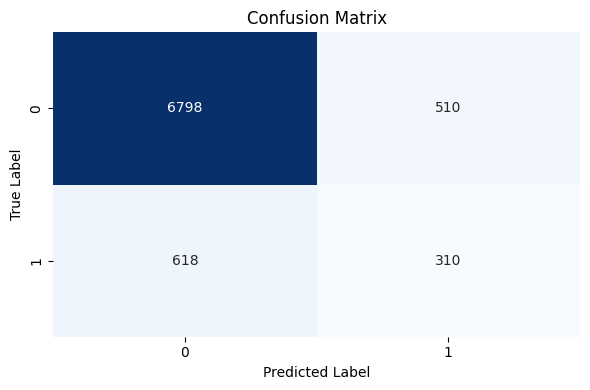

In [63]:
# Evaluate Model Performance
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix, classification_report
)
import seaborn as sns
import matplotlib.pyplot as plt

# Print Evaluation Metrics
print(" Model Evaluation Metrics:")
print(f" Accuracy       : {accuracy_score(y_test, y_pred):.4f}")
print(f" Precision      : {precision_score(y_test, y_pred):.4f}")
print(f" Recall         : {recall_score(y_test, y_pred):.4f}")
print(f" F1 Score       : {f1_score(y_test, y_pred):.4f}")
print(f" ROC AUC Score  : {roc_auc_score(y_test, y_proba):.4f}")

# Detailed Classification Report
print("\n Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


### Key Predictive Features

In [64]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
import pandas as pd

# Select only numeric columns (more robust than dropping specific columns)
X_train_numeric = X_train.select_dtypes(include=['number'])

# Impute missing values using the mean strategy
imputer = SimpleImputer(strategy='mean')
X_train_imputed_array = imputer.fit_transform(X_train_numeric)

# Convert back to DataFrame
X_train_imputed = pd.DataFrame(X_train_imputed_array, columns=X_train_numeric.columns)

# Train Logistic Regression
logreg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
logreg.fit(X_train_imputed, y_train)

# Save feature names for future use
feature_names = X_train_imputed.columns


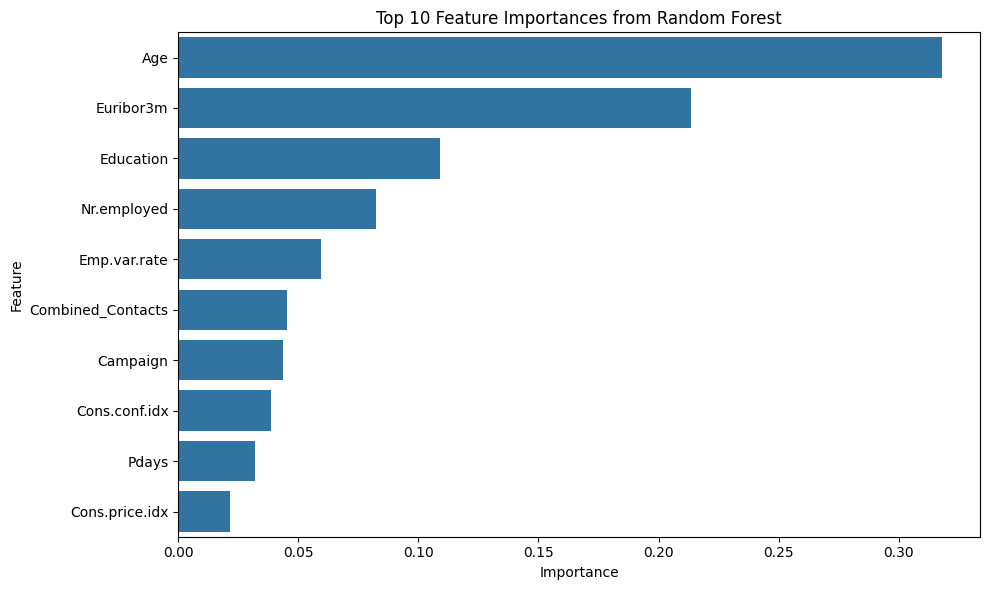

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Use feature names from the numeric training data used for Random Forest
feature_names = X_train_numeric.columns

# Retrieve feature importances from the trained Random Forest model
importances = rf_model.feature_importances_

# Create a DataFrame to pair feature names with their importance scores
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Visualize the top 10 most important features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10))
plt.title('Top 10 Feature Importances from Random Forest')
plt.tight_layout()
plt.show()


# Key EDA Findings:
**Imbalanced target:** Most clients did not subscribe to a term deposit.


**Age:** Older clients showed a higher subscription rate, especially those over 60.


**Job types**: Professions like retired and student had notably higher subscription rates.


**Contact method:** Cellular contact had better success rates than telephone.


**Last contact month:** Calls in March, September, December had higher subscription rates compared to the bulk of contacts made in May.


**Campaign duration:** Duration was a strong predictor — longer calls correlated with higher subscription likelihood.


**Previous outcome:** If a client was previously contacted successfully, the likelihood increased.



# Model Insights:
**Most impactful features (from model like Random Forest / Logistic Regression feature importance):**

Duration of last contact

Poutcome

Contact month

Age

Job type

# Characteristics of Clients Likely to Subscribe:
Typically older (60+)

Retired, students, or self-employed

Previously had a successful marketing outcome

Contacted via cellular

Calls conducted in March, September, December

Longer call durations

# Actionable Recommendations:
**Target segments:** Focus campaigns on retired individuals, students, and self-employed clients.


**Optimize contact channels:** Prioritize cellular calls over telephone.


**Refine campaign timing:** Schedule campaigns in March, September, and December.


**Leverage previous outcomes:** Re-engage clients with previous successful contacts.


**Train staff for impactful conversations** — longer, well-managed calls tend to convert better.